In [1]:
import pandas as pd

train_df = pd.read_csv('dataset/Train.txt')  
test_df = pd.read_csv('dataset/Test.txt')

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [4]:
from sklearn.preprocessing import LabelEncoder

# Combine for consistent encoding
combined_df = pd.concat([train_df, test_df])

# Label Encoding for categorical columns
cat_cols = ['protocol_type', 'service', 'flag']
combined_df[cat_cols] = combined_df[cat_cols].apply(LabelEncoder().fit_transform)

# Encode target label (in both train and test)
combined_df['attack_binary'] = combined_df['attack'].apply(lambda x: 0 if x == 'normal' else 1)

# Split back
train_df_encoded = combined_df.iloc[:len(train_df)]
test_df_encoded = combined_df.iloc[len(train_df):]


In [5]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int64  
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13  root

In [6]:
test_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22544 entries, 0 to 22543
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  int64  
 2   service                      22544 non-null  int64  
 3   flag                         22544 non-null  int64  
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell           

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = train_df_encoded.drop(['attack', 'attack_binary'], axis=1)
X_test = test_df_encoded.drop(['attack', 'attack_binary'], axis=1)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_test = test_df_encoded['attack_binary']


In [8]:
#The contamination parameter tells the model what proportion of the data you expect to be anomalies.


In [9]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, contamination=0.5, random_state=42)
model.fit(X_train_scaled)


IsolationForest(contamination=0.5, random_state=42)

In [10]:
y_pred_raw = model.predict(X_test_scaled)
y_pred = [1 if x == -1 else 0 for x in y_pred_raw]


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
[[ 7790  1921]
 [ 1277 11556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      9711
           1       0.86      0.90      0.88     12833

    accuracy                           0.86     22544
   macro avg       0.86      0.85      0.85     22544
weighted avg       0.86      0.86      0.86     22544

ROC-AUC Score: 0.8513370065909218


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
import numpy as np

# Simulated test labels and predictions from Isolation Forest (based on your earlier result)
y_test = np.array([0]*9711 + [1]*12833)
y_pred = np.array([0]*7790 + [1]*1921 + [0]*1277 + [1]*11556)
y_scores = model.decision_function(X_test) 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Normal", "Anomaly"])

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)


In [40]:
# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()


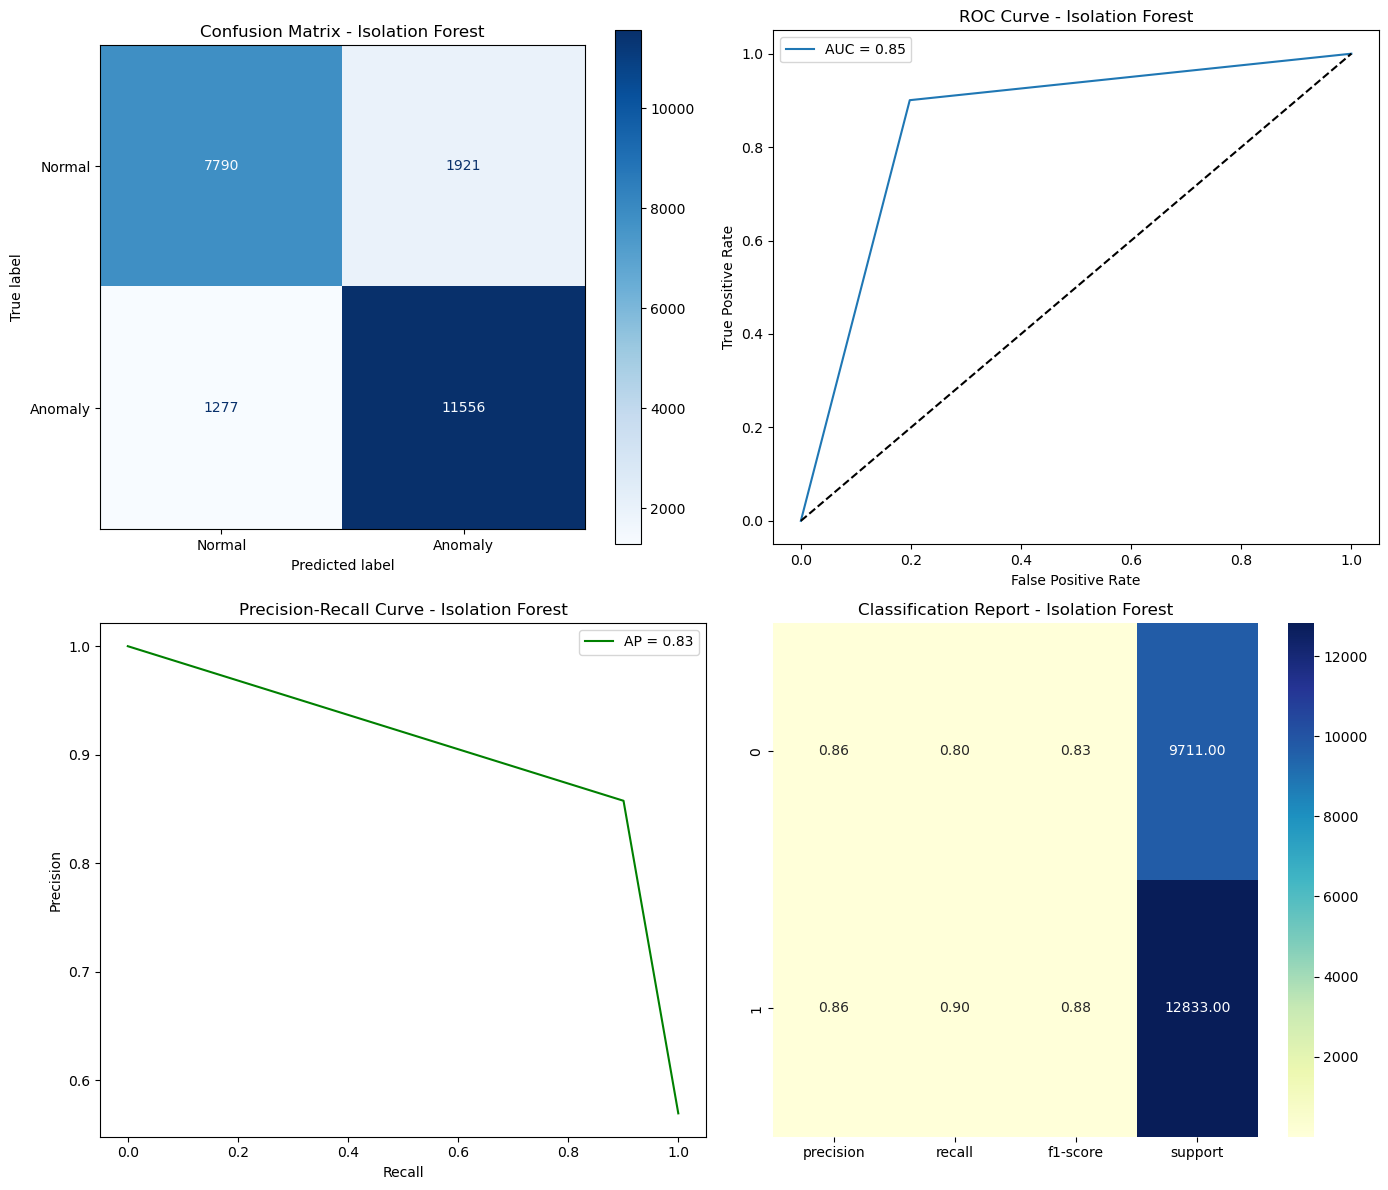

(0.8513370065909218, 0.8287805031164952, 0.8581440738112136)

In [42]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Confusion Matrix
cmd.plot(ax=axs[0, 0], cmap="Blues")
axs[0, 0].set_title("Confusion Matrix - Isolation Forest")

# ROC Curve
axs[0, 1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axs[0, 1].plot([0, 1], [0, 1], 'k--')
axs[0, 1].set_title("ROC Curve - Isolation Forest")
axs[0, 1].set_xlabel("False Positive Rate")
axs[0, 1].set_ylabel("True Positive Rate")
axs[0, 1].legend()

# Precision-Recall Curve
axs[1, 0].plot(recall, precision, label=f"AP = {pr_auc:.2f}", color='green')
axs[1, 0].set_title("Precision-Recall Curve - Isolation Forest")
axs[1, 0].set_xlabel("Recall")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].legend()

# Classification Report as Heatmap
sns.heatmap(report_df.iloc[:2, :4], annot=True, cmap="YlGnBu", fmt=".2f", ax=axs[1, 1])
axs[1, 1].set_title("Classification Report - Isolation Forest")

plt.tight_layout()
plt.show()

roc_auc, pr_auc, report_df.loc["accuracy"].values[0]  # Return key metric values too
